# 项目8 支持向量机

## 项目知识准备

### 支持向量机的核函数与参数选择

#### 1. 数据读取和预处理

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
# 创建50个数据点，分为两类
X, y = make_blobs(n_samples=50, centers=2, random_state=6)
# 创建一个线性内核的支持向量机模型
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### 2. 画出分类的决定边界

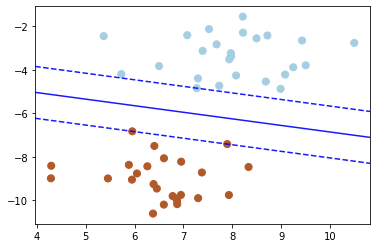

In [31]:
# 把数据点画出来
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
#建立图像坐标
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
nn = np.linspace(xlim[0], xlim[1], 50)
mm = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(mm,nn)
nm = np.vstack([XX.ravel(), YY.ravel()]).T
K = clf.decision_function(nm).reshape(XX.shape)
# 把分类的决定边界画出来
ax.contour(XX, YY, K, colors='b', levels=[-1, 0, 1], alpha=0.9,
           linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

## 项目实训

### 任务一 用SVM完成鸢尾花分类任务

#### 1. 数据读取和预处理

In [34]:
#导入数据
from sklearn import datasets
iris = datasets.load_iris()
# 数据集拆分
from sklearn.model_selection import train_test_split
# 特征
feature = iris.data
# 分类标签
label = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(feature, label, 
                                                    test_size=0.25, 
                                                    random_state=62)

#### 2. 训练模型

In [36]:
#定义模型
from sklearn import svm
svm_classifier = svm.SVC(C=1.0, kernel='rbf', decision_function_shape='ovr',
                         gamma='auto')
svm_classifier.fit(X_train, Y_train)
print("训练集:", svm_classifier.score(X_train, Y_train))
print("测试集:", svm_classifier.score(X_test, Y_test))

训练集: 0.9910714285714286
测试集: 0.9473684210526315


### 任务二 SVM算法实战

#### 1.导入数据集

In [37]:
#导入breast_cancer模块
from sklearn.datasets import load_breast_cancer
#从sklearn的datasets模块载入数据集
cancer = load_breast_cancer()
#输出breast_cancer数据集中的键
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


#### 2. 数据预处理

In [38]:
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, 
                                                    random_state=66)
from sklearn.preprocessing import StandardScaler
# 标准化数据
nn = StandardScaler()
X_train = nn.fit_transform(X_train)
X_test = nn.transform(X_test)

#### 3．训练模型

In [39]:
from sklearn import svm
svm_classifier = svm.SVC(C=1.0, kernel='rbf', decision_function_shape='ovr',
                         gamma='auto')
svm_classifier.fit(X_train, Y_train)
print("训练集:", svm_classifier.score(X_train, Y_train))
print("测试集:", svm_classifier.score(X_test, Y_test))

训练集: 0.9859154929577465
测试集: 0.972027972027972


## 项目拓展

### 波士顿房价分析

#### 1．导入数据集

In [40]:
from sklearn.datasets import load_boston
# 导入数据集
boston = load_boston()
print(boston.keys())
data = boston.data
target = boston.target

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


#### 2．数据预处理

In [41]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
# 数据预处理
X_train,X_test,Y_train,Y_test = train_test_split(data,target,test_size=0.3)
# 特征进行标准化
Stand_X = StandardScaler()  
# 标签也是数值，也需要进行标准化
Stand_Y = StandardScaler()
X_train = Stand_X.fit_transform(X_train)
X_test = Stand_X.transform(X_test)
Y_train = Stand_Y.fit_transform(Y_train.reshape(-1,1))
Y_test = Stand_Y.transform(Y_test.reshape(-1,1))

#### 3．训练模型

In [42]:
from sklearn.svm import SVR,LinearSVR
# 线性内核函数
clf = LinearSVR(C=1)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("训练集评分：", clf.score(X_train,Y_train))
print("测试集评分：", clf.score(X_test,Y_test))

训练集评分： 0.6820315908477788
测试集评分： 0.7822623925103901


D:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [43]:
from sklearn.svm import SVR
# 高斯内核函数
clf = SVR(kernel='rbf',C=100,gamma=0.1)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("训练集评分：", clf.score(X_train,Y_train))
print("测试集评分：", clf.score(X_test,Y_test))

训练集评分： 0.9898779723613051
测试集评分： 0.8255846746793745


D:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
